In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
## importing the libraries

import numpy as np
import pandas as pd
from custom_packages import random_csv_selector
from custom_packages.preprocess import data_preprocessor
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import LabelEncoder
import scipy.stats as sps
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)
sns.set_style("darkgrid")

In [4]:
data = pd.read_csv("EDA_Data_01.csv")
data_2 = pd.read_csv("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw/352891066262722_2019-01-08_cb.csv")

In [5]:
data.head()

,Unnamed: 0,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,0,0,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,0,1543193200380,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
1,1,1,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,100,1543193200480,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
2,2,2,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,200,1543193200580,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
3,3,3,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,300,1543193200680,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,18

In [6]:
data.mo.unique()

array(['DEFREG:352891066263282', 'DEFREG:352891066262722',
       'DEFREG:358272088699072'], dtype=object)

In [7]:
data_2.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:352891066262722,Trip not started,NaN,77.07351,28.49696,NaN,NaN,1546918001380,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,-512.0,-328.0,267.0,186.0,16198.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,11,0,21,13.9,0,-0.125,-279.0,0.7,0,-65532,0,4067,11.5,1,10.7,4,65,1,0,4000,4000,4000,137,0,-733.0,731.0,6.0,NaN
1,DEFREG:352891066262722,Trip not started,NaN,77.07351,28.49696,NaN,NaN,1546918001480,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,-512.0,-328.0,267.0,186.0,16198.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,11,0,21,13.9,0,-0.125,-279.0,0.7,0,-65532,0,4067,11.5,1,10.7,4,65,1,0,4000,4000,4000,137,0,-733.0,731.0,6.0,NaN
2,DEFREG:352891066262722,Trip not started,NaN,77.07351,28.49696,NaN,NaN,1546918001580,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,-512.0,-328.0,267.0,186.0,16198.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,11,0,21,13.9,0,-0.125,-279.0,0.7,0,-65532,0,4067,11.5,1,10.7,4,65,1,0,4000,4000,4000,137,0,-733.0,731.0,6.0,NaN
3,DEFREG:352891066262722,Trip not started,NaN,77.07351,28.49696,NaN,NaN,1546918001680,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,-512.0,-328.0,267.0,186.0,16198.0,1830

In [8]:
data_2 = data_preprocessor(data_2)

In [9]:
data_2.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:352891066262722,1,NaN,77.07351,28.49696,NaN,0,1546918001380,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,12.5,10.0,267.0,252.5,253.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,11,0,21,13.9,0,-0.125,-279.0,0.7,0,-65532,0,4067,11.5,1,10.7,4,65,1,0,4000,4000,4000,137,0,-733.0,731.0,6.0,NaN
1,DEFREG:352891066262722,1,NaN,77.07351,28.49696,NaN,100,1546918001480,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,12.5,10.0,267.0,252.5,253.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,11,0,21,13.9,0,-0.125,-279.0,0.7,0,-65532,0,4067,11.5,1,10.7,4,65,1,0,4000,4000,4000,137,0,-733.0,731.0,6.0,NaN
2,DEFREG:352891066262722,1,NaN,77.07351,28.49696,NaN,200,1546918001580,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,12.5,10.0,267.0,252.5,253.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,11,0,21,13.9,0,-0.125,-279.0,0.7,0,-65532,0,4067,11.5,1,10.7,4,65,1,0,4000,4000,4000,137,0,-733.0,731.0,6.0,NaN
3,DEFREG:352891066262722,1,NaN,77.07351,28.49696,NaN,300,1546918001680,77.073615,28.496959,0.657325,714359872,5,30.0,1.1,7,352891066262722,Trip not started,P,M1_POCEV.0,NaN,1,877,0.0,87,10,0,0,1,0.0,1,13.9,0,48.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0.45,0.0,4.03,4.03,92.9,92.9,92.6,92.6,100,15.5,15.5,15.5,14.0,14.0,14.0,0.25,12.5,10.0,267.0,252.5,253.0,1830,1830,99.9,99.9,11,-50,-38,11,166,203,11,-50,-41,11,172,213,512.0,-0.2,0,-0.2,-0.2,270

---

In [10]:
def trip_data(data, trip_number, col_1, col_2):
    """
    This function returns a particular trip data, with EVSMA_Smoothened and Delta EVSMA. along with the column for 
    efficient comparision.
    """
    trip_df = data[data["tp"] == trip_number]
    trip_df = trip_df["EVSMA_MAX"].to_frame()
    span = 600
    alpha = 2/(1 + span)
    trip_df["EVSMA_EWMA"] = np.nan
    trip_df["EVSMA_EWMA"].iloc[0] = trip_df["EVSMA_MAX"].iloc[0]
    
    for i in range(1, len(trip_df)):
        temp = (trip_df["EVSMA_MAX"].iloc[i]*alpha) + (trip_df["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
        trip_df["EVSMA_EWMA"].iloc[i] = temp
    
    trip_df["EVSMA_Shift"] = trip_df["EVSMA_EWMA"].shift(periods = 1)
    trip_df["EVSMA_Shift"].iloc[0] = trip_df["EVSMA_EWMA"].iloc[0]
    trip_df["EVSMA_EWMA"] = abs(trip_df["EVSMA_EWMA"] - trip_df["EVSMA_Shift"])
    
    trip_df[col_1] = data[data["tp"] == trip_number][col_1]
    trip_df[col_2] = data[data["tp"] == trip_number][col_2]
    
    df = trip_df[[col_1, col_2, "EVSMA_MAX", "EVSMA_EWMA"]][600:]
    
    return df

In [11]:
def relative_corr(data, col_1, col_2):
    """
    This function returns the Correlation dataframe of target variable with two attributes
    """
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_delta"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t[col_1] = data[data["tp"] == i+1][col_1]
        trip_t[col_2] = data[data["tp"] == i+1][col_2]
        
        temp_data = trip_t[[col_1, col_2, "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data[col_1].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data[col_2].corr(temp_data["EVSMA_MAX"])
        c3 = temp_data[col_1].corr(temp_data[col_2])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
        
        a = col_1 + " & SMA_MAX"
        b = col_2 + " & SMA_MAX"
        ab = col_1 + " & " + col_2
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        a: corr_1,
        b: corr_2,
        ab: corr_3
    })
    
    return SMA_corr

In [12]:
def corr_scatterplot(data):
    """
    this function plots the scatter plot of length of the trip vs correlation of attribute with EVSMA_MAX
    """
    label_1 = data.columns[1]
    label_2 = data.columns[2]
    label_3 = data.columns[3]
    sns.scatterplot(x = data["Length"], 
                    y = data.iloc[:, 1], 
                    color = "red", 
                    label = label_1)
    sns.scatterplot(x = data["Length"], 
                    y = data.iloc[:, 2], 
                    color = "black", 
                    label = label_2)
    sns.scatterplot(x = data["Length"], 
                    y = data.iloc[:, 3], 
                    color = "blue", 
                    label = label_3)
    plt.show()

In [13]:
def eval_pdf(rv, num = 4):
    mean, std_dev = rv.mean(), rv.std()
    xs = np.linspace(mean - (num*std_dev), mean+(num*std_dev), 100)
    ys = rv.pdf(xs)
    return xs, ys

In [14]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group1)
    var1, var2 = group1.var(), group2.var()
    pooled_var = ((n1*var1) + (n2*var2))/(n1 + n2)
    d = diff/np.sqrt(pooled_var)
    return d

In [15]:
def overlap_superiority(control, treatment, n = 1000):
    """
    Estimates overlap and superiority based on the sample
    control - rv object
    treatment - rv object
    n: samples
    """
    control_samples = control.rvs()
    treatment_samples = treatment.rvs()
    threshold = (control.mean() + treatment.mean())/2
    control_above = sum(control_samples > threshold)
    treatment_below = sum(treatment_samples < threshold)
    overlap = (control_above + treatment_below)/n
    superiority = (treatment_samples > control_samples).mean()
    return overlap, superiority

In [16]:
def plot_pdfs(cohen_d):
    """
    plot PDFs for distributions that differ by some number of standard deviations
    cohen_d: number of standard deviations between the mean
    """
    control = sps.norm(0, 1)
    treatment = sps.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label = "control", color = "blue", alpha = 0.7)
    
    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label = "treatment", color = "red", alpha = 0.7)
    
    #o, s = overlap_superiority(control, treatment)
    #plt.text(0, 0.05, "overlap" + str(o))
    #plt.text(0, 0.15, "superioty" + str(s))
    plt.legend()
    plt.show()

---

In [17]:
data_2["tp"].unique()

array([1, 2, 3, 4, 5])

In [22]:
temp_df = trip_data(data, 39, "EVIND", "EVHTP_AVG") 
len(temp_df)

44400

In [24]:
temp_df.sample(5)

,EVIND,EVHTP_AVG,EVSMA_MAX,EVSMA_EWMA
698121,250,0,62.7,0.000437
708638,248,0,56.9,0.000931
698060,250,0,62.7,0.000536
718723,244,0,52.0,0.000324
701158,250,0,61.1,0.000660


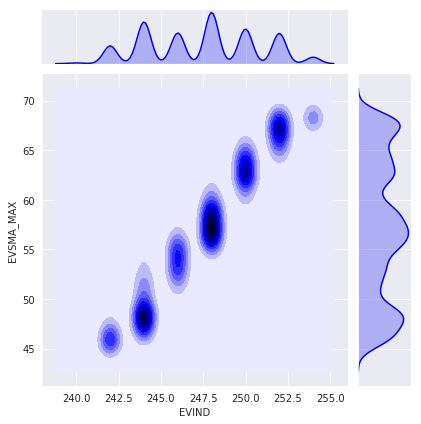

In [26]:
sns.jointplot(x = "EVIND", y = "EVSMA_MAX", data = temp_df, kind = "kde", color = "blue")
plt.show()

In [27]:
temp_corr_data = relative_corr(data, "EVIND", "EVHTP_AVG")

In [30]:
temp_corr_data

,Length,EVIND & SMA_MAX,EVHTP_AVG & SMA_MAX,EVIND & EVHTP_AVG
0,0,NaN,NaN,NaN
1,24600,0.93,0.15,0.16
2,23400,0.75,0.16,0.14
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,3000,0.08,0.75,0.05
7,23400,0.92,0.38,0.35
8,11400,0.76,-0.26,-0.32
9,19198,0.41,0.37,0.14


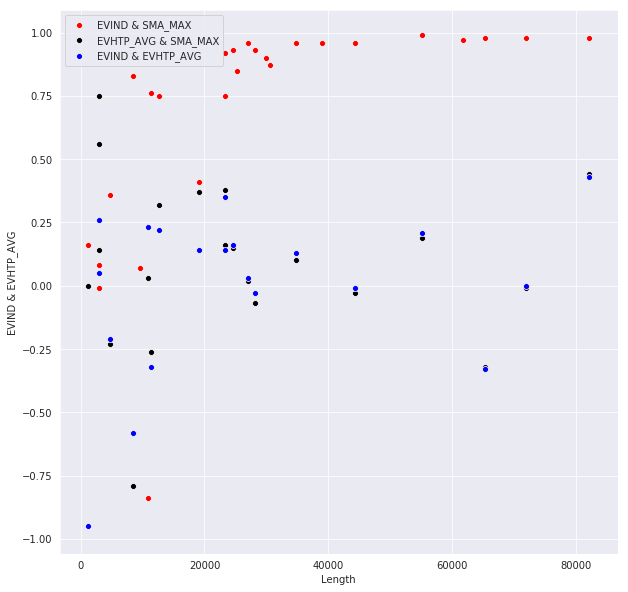

In [28]:
corr_scatterplot(temp_corr_data)

In [29]:
data.EVIND.corr(data.EVSMA_MAX)

0.32622435463850247

In [22]:
effect_size = cohen_effect_size(b, a)

In [23]:
print(effect_size)

0.9774690035717833


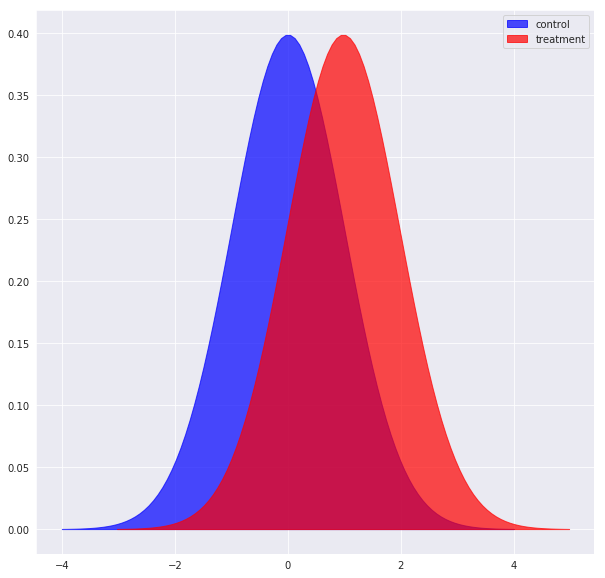

In [24]:
plot_pdfs(effect_size)

In [25]:
temp_df = trip_data(data, 2, "EVHTR", "EVOAS") 
len(temp_df)

24600

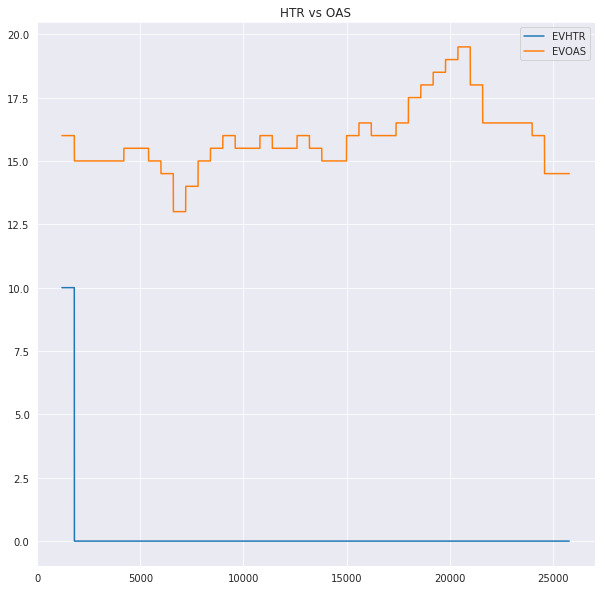

In [26]:
plt.plot(temp_df["EVHTR"]*10, label = "EVHTR")
plt.plot(temp_df["EVOAS"], label = "EVOAS")
plt.legend()
plt.title("HTR vs OAS")
plt.show()

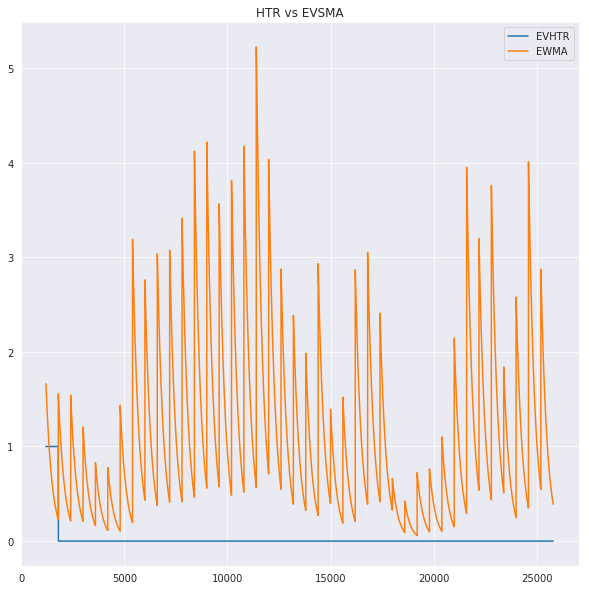

In [27]:
plt.plot(temp_df["EVHTR"], label = "EVHTR")
plt.plot(temp_df["EVSMA_EWMA"]*1000, label = "EWMA")
plt.legend()
plt.title("HTR vs EVSMA")
plt.show()

In [28]:
a = temp_df[temp_df["EVHTR"] == 1]["EVSMA_EWMA"].values
b = temp_df[temp_df["EVHTR"] == 0]["EVSMA_EWMA"].values
effect_size = cohen_effect_size(b, a)
print(effect_size)

0.5605457465519547


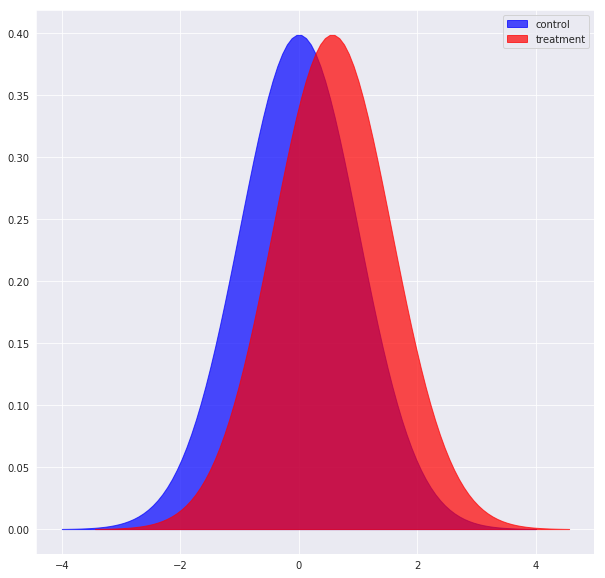

In [29]:
plot_pdfs(effect_size)

When the duration of `HTR` is large, effect size of `HTR` with `EVSMA_EWMA` is visible, when it is small, it is little less, but this is significant.

----
---
-----